<a href="https://colab.research.google.com/github/LittlePandaCode/CodeAlpha_Credit_Scoring_Mode/blob/main/Quantium_Internship_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load required libraries and datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats


In [ ]:
customer =pd.read_csv("/content/drive/MyDrive/Datasets/Quantium /QVI_purchase_behaviour (1).csv",header=0)

In [ ]:
transaction=pd.read_excel("/content/drive/MyDrive/Datasets/Quantium /QVI_transaction_data (1).xlsx",header=0)

#**Pre_traitement :**

### **1)  Data visualization**

In [ ]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### **2) convert DATE to data type**

In [ ]:
transaction['DATE']=pd.to_datetime(transaction['DATE'], origin='1899-12-30', unit='D')
#   Unit='D': specifier que les entiers repesentent les jours

In [ ]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### **3) testing la column PROD_NAME**




In [ ]:
transaction['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

We must ensure that all products are chips

In [ ]:
characters_remove=r'[|.,()\\"$!?/:;\-\'\'£#$&]'
transaction['PROD_NAME']=transaction['PROD_NAME'].dropna()
transaction['PROD_NAME']=transaction['PROD_NAME'].str.replace(characters_remove,'',regex=True)
transaction['PROD_NAME']=transaction['PROD_NAME'].str.lower()

In [ ]:
words=transaction['PROD_NAME'].str.split()
# determiner les mots existants et calculer leur frequence
words_unique=[word for sublist in words for word in sublist]
words_count=pd.Series(words_unique).value_counts()
# trier les par leur frequence
sorted_words=words_count.sort_values(ascending=False)
# afficher le resultats
print(sorted_words)

175g        60561
chips       49770
150g        43131
kettle      41288
smiths      28860
            ...  
sunbites     1432
pc           1431
ncc          1419
garden       1419
fries        1418
Length: 215, dtype: int64


we need to keep only chips products

In [ ]:
transaction = transaction[transaction['PROD_NAME'].str.contains('chips', case=False)]
transaction.info()
''' case=False argument is used to make the search case-insensitive.
This means that the str.contains() method will match the string 'chips' regardless
of whether it's written in uppercase, lowercase, or a combination of both.

By setting case=False, you ensure that the search for the word 'chips' is not
sensitive to the case of the letters, so it will match 'chips', 'Chips', 'CHIPS',
and any other combination of uppercase and lowercase letters.'''


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49770 entries, 2 to 264830
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            49770 non-null  datetime64[ns]
 1   STORE_NBR       49770 non-null  int64         
 2   LYLTY_CARD_NBR  49770 non-null  int64         
 3   TXN_ID          49770 non-null  int64         
 4   PROD_NBR        49770 non-null  int64         
 5   PROD_NAME       49770 non-null  object        
 6   PROD_QTY        49770 non-null  int64         
 7   TOT_SALES       49770 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.4+ MB


" case=False argument is used to make the search case-insensitive.\nThis means that the str.contains() method will match the string 'chips' regardless\nof whether it's written in uppercase, lowercase, or a combination of both.\n\nBy setting case=False, you ensure that the search for the word 'chips' is not\nsensitive to the case of the letters, so it will match 'chips', 'Chips', 'CHIPS',\nand any other combination of uppercase and lowercase letters."

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49770 entries, 2 to 264830
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            49770 non-null  datetime64[ns]
 1   STORE_NBR       49770 non-null  int64         
 2   LYLTY_CARD_NBR  49770 non-null  int64         
 3   TXN_ID          49770 non-null  int64         
 4   PROD_NBR        49770 non-null  int64         
 5   PROD_NAME       49770 non-null  object        
 6   PROD_QTY        49770 non-null  int64         
 7   TOT_SALES       49770 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.4+ MB


### **4) Remove outliers or null values**




In [ ]:
#purchase.info()
#transaction.info()
# dans la dataset on n'a pas de donnees manquants mais on a des donnees aberrantes (la qualite de produit = 200)
# on doit eliminer ce point
#transaction=transaction[transaction["PROD_QTY"]!=200]
transaction=transaction[transaction["LYLTY_CARD_NBR"]!=226000]
transaction.dropna(inplace=True)
customer.dropna(inplace=True)

In [ ]:
transaction.PROD_QTY.unique()

array([2, 1, 5, 4, 3])

In [ ]:
transaction[transaction["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


### **5) Examining the number of transactions per date to remove any outliers**

In [ ]:
nb=transaction['DATE'].unique()
print(nb.size)

364


there is a missing value, so we will  create a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019, and join it onto the data to fill in the missing day.  


In [ ]:
dates_df=pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')})
transaction=pd.merge(dates_df,transaction,on='DATE', how='left')

In [ ]:
dates_count= transaction['DATE'].value_counts()
print(dates_count.count())

365


We can see that there is an increase in purchases in December and a break in late December.

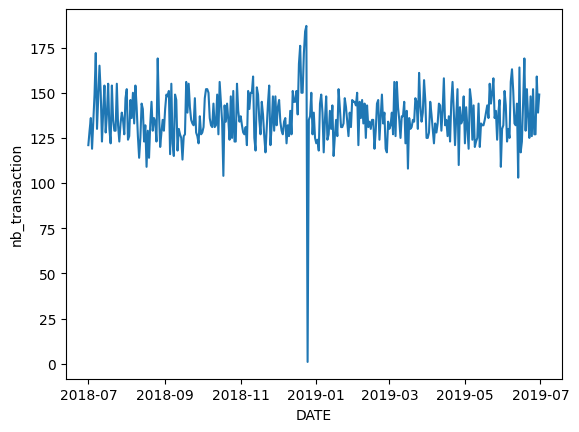

In [ ]:
# creer un graphe
date_group=transaction.groupby('DATE').size()
plt.plot(date_group.index, date_group)
plt.xlabel('DATE')
plt.ylabel('nb_transaction')
plt.show()

**Let's zoom in on this.**

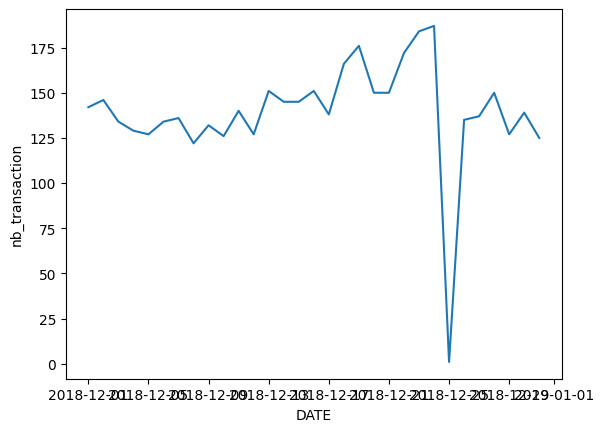

In [ ]:
decembre_data=transaction[transaction['DATE'].dt.month==12]
decembre_group=decembre_data.groupby(decembre_data['DATE'].dt.date).size()
plt.plot(decembre_group.index, decembre_group)
plt.xlabel('DATE')
plt.ylabel('nb_transaction')
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

**Now that we are satisfied that the data no longer has outliers, we can move on to creating other features**

### Pack size

In [ ]:
def parse_number(text):
    # Use regex to find a number in the text
    match = re.search(r'\d+', str(text))
    if match:
        return int(match.group())
    else:
        return None

# Example usage
transaction['PACK_SIZE'] = transaction['PROD_NAME'].apply(parse_number)

 a histogram showing the number of transactions by pack size.

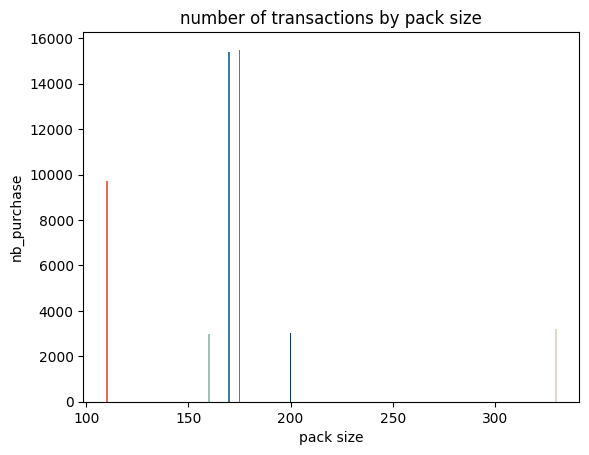

In [ ]:
color=['#ed6a5a','#9bc1bc','#427aa1','#d1495b','#0d3b66','#ead7c3']
pack_group=transaction.groupby('PACK_SIZE').size()
plt.bar(pack_group.index,pack_group, color=color)
plt.title("number of transactions by pack size")
plt.xlabel("pack size")
plt.ylabel("nb_purchase")
plt.show()

In [ ]:
customer.info()
#customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


###Brands

In [ ]:
def parse_brand(text):
    brand=str(text).split()[0]
    return brand

transaction['BRAND'] = transaction['PROD_NAME'].apply(parse_brand)

In [ ]:
transaction.PROD_NAME.unique()

array(['thins chips light  tangy 175g',
       'thins potato chips  hot  spicy 175g',
       'ww sour cream onionstacked chips 160g',
       'smiths crinkle cut  chips chsonion170g',
       'smiths crinkle chips salt  vinegar 330g',
       'cobs popd sour crm  chives chips 110g',
       'ww supreme cheese   corn chips 200g',
       'doritos corn chips  cheese supreme 170g',
       'doritos corn chips  original 170g',
       'thins chips salt   vinegar 175g',
       'doritos corn chips  nacho cheese 170g',
       'ww original stacked chips 160g',
       'thins chips seasonedchicken 175g',
       'french fries potato chips 175g',
       'smiths crinkle cut  chips chicken 170g',
       'ww original corn    chips 200g',
       'cobs popd swtchlli srcream chips 110g',
       'thins chips         originl saltd 175g',
       'cobs popd sea salt  chips 110g',
       'smiths crinkle cut  chips original 170g',
       'smiths crinkle cut  chips barbecue 170g', nan], dtype=object)

### ***Merging the 2 datasets***

> we ll kwwp this columns for our analytics:                                 
  PROD_NAME, PROD_QTY, TOT_SALES, LIFESTAGE,	PREMIUM_CUSTOME, DATE, PACK_SIZE, BRAND.







In [ ]:
df=pd.merge(customer , transaction,on="LYLTY_CARD_NBR",how="inner")
df=df.drop(columns=["STORE_NBR","TXN_ID","PROD_NBR"])
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,ww original stacked chips 160g,1.0,1.9,160.0,ww
1,1011,OLDER SINGLES/COUPLES,Mainstream,2018-12-19,smiths crinkle cut chips barbecue 170g,1.0,2.9,170.0,smiths
2,1027,OLDER FAMILIES,Premium,2018-08-13,smiths crinkle chips salt vinegar 330g,1.0,5.7,330.0,smiths
3,1034,RETIREES,Premium,2019-03-24,cobs popd sea salt chips 110g,1.0,3.8,110.0,cobs
4,1043,YOUNG FAMILIES,Budget,2019-02-16,thins chips seasonedchicken 175g,1.0,3.3,175.0,thins


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49770 entries, 0 to 49769
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   LYLTY_CARD_NBR    49770 non-null  int64         
 1   LIFESTAGE         49770 non-null  object        
 2   PREMIUM_CUSTOMER  49770 non-null  object        
 3   DATE              49770 non-null  datetime64[ns]
 4   PROD_NAME         49770 non-null  object        
 5   PROD_QTY          49770 non-null  float64       
 6   TOT_SALES         49770 non-null  float64       
 7   PACK_SIZE         49770 non-null  float64       
 8   BRAND             49770 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.8+ MB


Create a column which contains the brand of the product, by extracting it from the product name

transaction.BRAND.unique()

# **visualising the data**

#### **Total sales by LIFESTAGE and PREMIUM_CUSTOMER**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


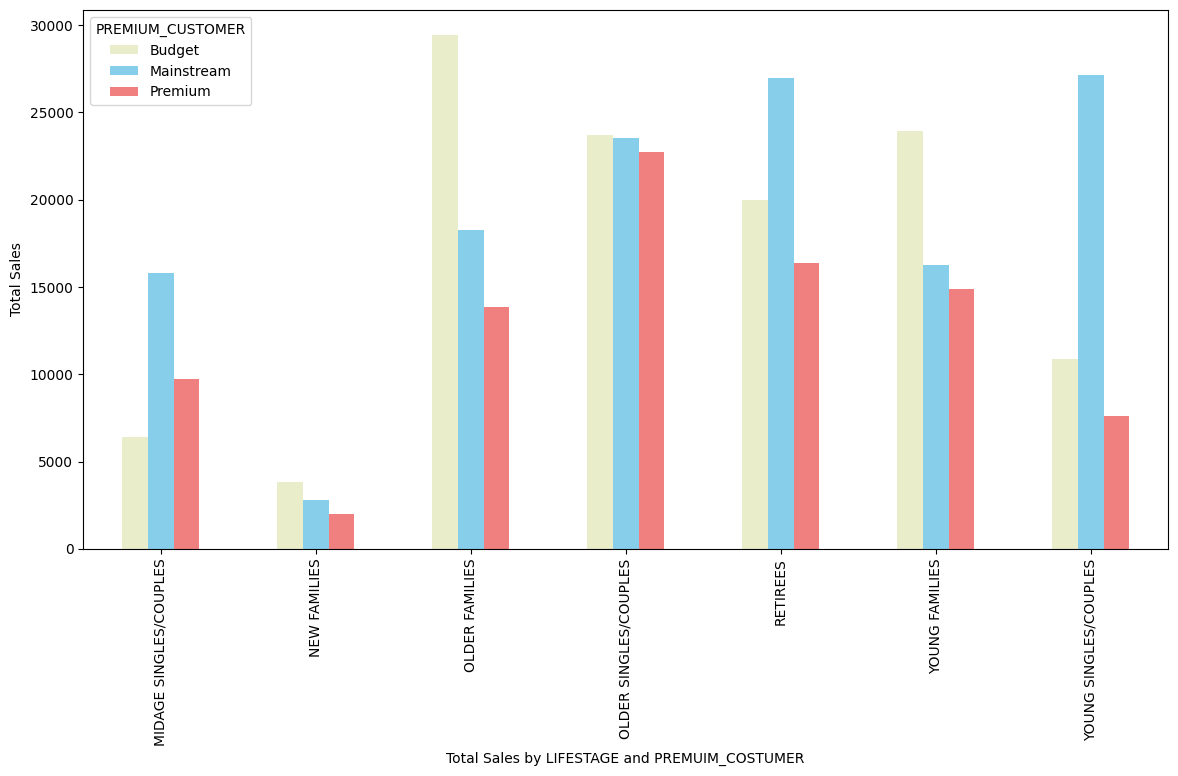

In [ ]:
sales=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
colors_1 = ['#e9edc9', 'skyblue', 'lightcoral']
sales.plot(kind='bar', figsize=(14,7),color=colors_1)
plt.ylabel('Total Sales')
plt.xlabel('Total Sales by LIFESTAGE and PREMUIM_COSTUMER')
plt.legend(title='PREMIUM_CUSTOMER', loc='upper left')
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

#### **Number of customers by LIFESTAGE and PREMIUM_CUSTOMER**





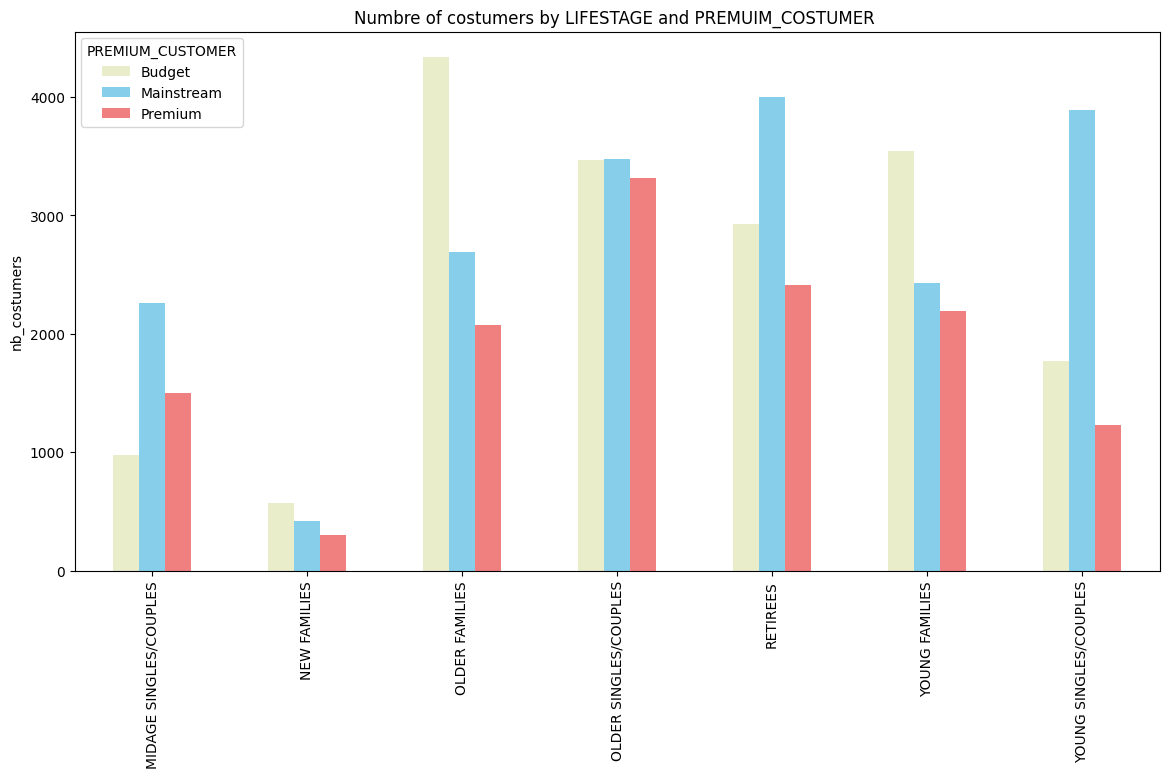

In [ ]:
sales=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().unstack()
colors_1 = ['#e9edc9', 'skyblue', 'lightcoral']
sales.plot(kind='bar', figsize=(14,7),color=colors_1)
plt.ylabel('nb_costumers')
plt.xlabel('')
plt.title('Numbre of costumers by LIFESTAGE and PREMUIM_COSTUMER ')
plt.legend(title='PREMIUM_CUSTOMER', loc='upper left')
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment. Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.

#### **Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER**

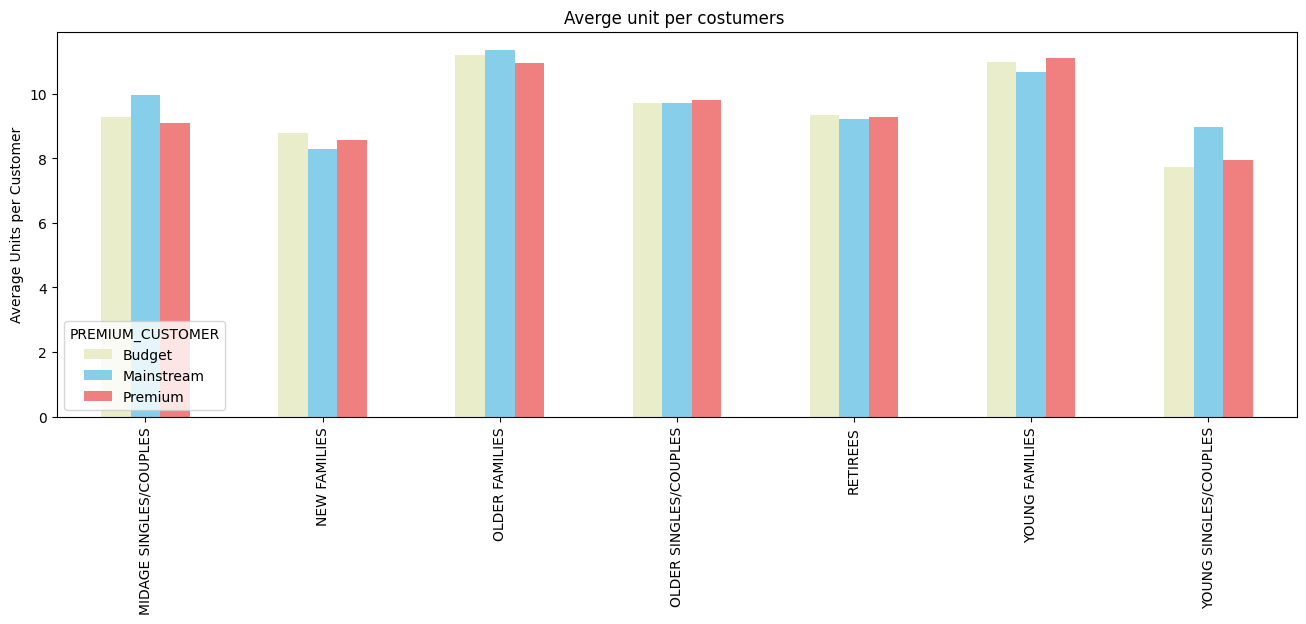

In [ ]:
grouped=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])
total_unit=grouped['TOT_SALES'].sum()
tot_costumers=grouped['LYLTY_CARD_NBR'].nunique()
averge_unit_per_costumers=total_unit/tot_costumers
averge_unit_per_costumers.unstack().plot(kind='bar',figsize=(16,5), color=colors_1)
plt.ylabel('Average Units per Customer')
plt.xlabel('')
plt.title('Averge unit per costumers ')
plt.legend(title='PREMIUM_CUSTOMER', loc='lower left')
plt.show()

Older families and young families in general buy more chips per customer

#### **Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER**

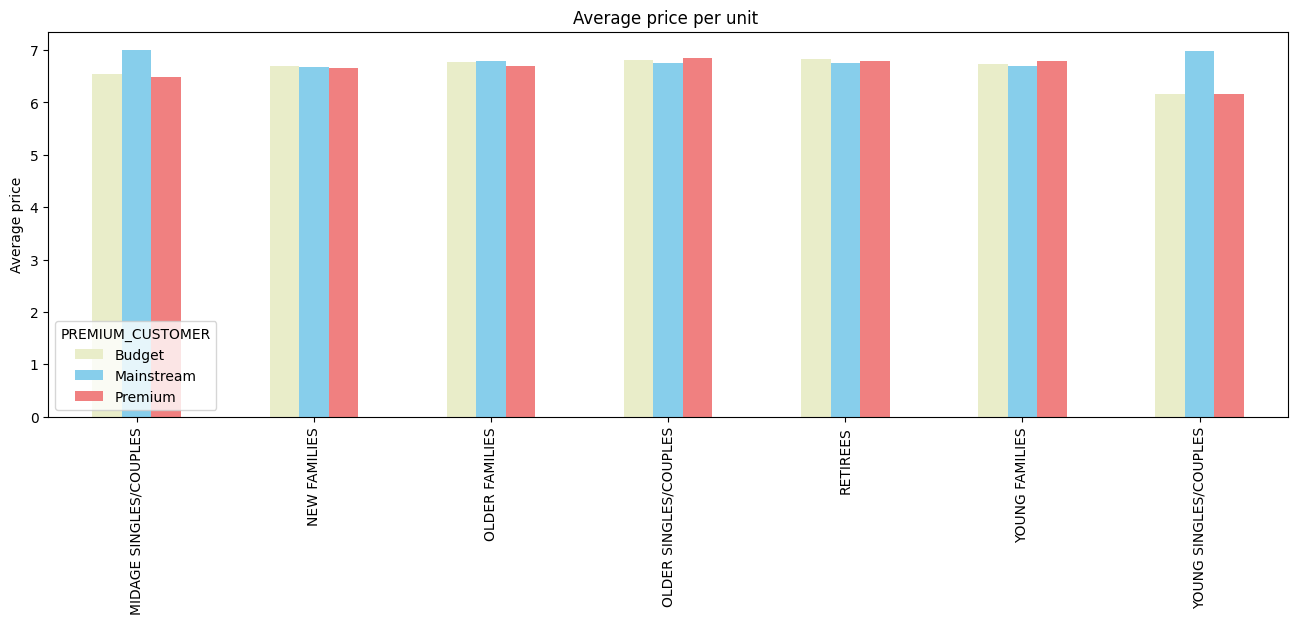

In [ ]:
grouped=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])
total_price=grouped['TOT_SALES'].sum()
tot_unit=grouped['PROD_QTY'].count()
averge_price_per_unit=total_price/tot_unit
averge_price_per_unit.unstack().plot(kind='bar',figsize=(16,5), color=colors_1)
plt.ylabel('Average price')
plt.xlabel('')
plt.title('Average price per unit ')
plt.legend(title='PREMIUM_CUSTOMER', loc='lower left')
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

####**Independent t-test**

 Perform an independent t-test between mainstream **vs** premium and budget midage

In [ ]:
from scipy.stats import ttest_ind

young_midage_couples = df.loc[df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES'])]
midage_couples = df.loc[df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']
df['Unit_price']=df['TOT_SALES']/df['PROD_QTY']

# YOUNG SINGLES/COUPLES
mainstream = young_midage_couples.loc[young_midage_couples['PREMIUM_CUSTOMER'] == 'Mainstream']
premium = young_midage_couples.loc[young_midage_couples['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])]

t_statistic, p_value = ttest_ind(mainstream['TOT_SALES'], premium['TOT_SALES'], equal_var=False)
# Display results
print("\nResults for independant t-test:")
print("p-value:", p_value)
if p_value < 0.05:
    print("There is a statistically significant difference between the groups.\n")
else:
    print("There is no statistically significant difference between the groups.\n")

# higher price by unit
if mainstream['Unit_price'].mean()> premium['Unit_price'].mean():
  print(f"The t-test results in a p-value of {p_value:.2e}, i.e. the unit price for mainstream, \nyoung and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.")
else:
  print(f"The t-test results in a p-value of {p_value:.2e}, i.e. the unit price for mainstream, \nyoung and mid-age singles and couples ARE NOT significantly higher than that of budget or premium, young and midage singles and couples.")


Results for independant t-test:
p-value: 1.4016850037848915e-59
There is a statistically significant difference between the groups.

The t-test results in a p-value of 1.40e-59, i.e. the unit price for mainstream, 
young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.


### **Deep dive into Mainstream, young singles/couples**
what are brands that these two customer segments prefer more than others

In [ ]:

# Filter transactions for Mainstream, young singles/couples
mainstream_young = df[(df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Calculate the frequency of each brand
brand_counts = mainstream_young['BRAND'].value_counts()

# Find the brand with the highest frequency
most_purchased_brand = brand_counts.idxmax()

print(f"The most purchased brand by Mainstream, young singles/couples is:{ most_purchased_brand}\n\n")

The most purchased brand by Mainstream, young singles/couples is:thins




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# filter transactions for MAINSTREAM, YOUNG SINGLES/COUPLES
Mainstream_young=df[(df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Calculate the frequency of each Pack_size
pack_counts= Mainstream_young['PACK_SIZE'].value_counts()

#Find the Pack_size with the highest frequency
most_Pack_size=pack_counts.idxmax()

print(f"The most purchased Pack size by Mainstream, young singles/couples is:{ most_Pack_size} g\n\n")

The most purchased Pack size by Mainstream, young singles/couples is:175.0 g




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
